In [1]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from scipy.interpolate import interp1d
oakdir="/oak/stanford/orgs/kipac/users/xinshuo/"
snapdir=oakdir+"QuijoteData/Snapshots/fiducial_ZA/0/"
zmap={0:3,1:2,2:1,3:0.5,4:0} # snapno and redshift
QuijoteFid = {'H0': 67.11,
 'Ob0': 0.049, 
 'Om0': 0.3175,
 'flat': True,
 'ns': 0.9624,
 'sigma8': 0.834}
mycosmos =  cosmology.setCosmology("QuijoteFid", **QuijoteFid)


from nbodykit.lab import cosmology
# define Quijote and mycosmos
cosmo = cosmology.Cosmology()
Qcosmos = cosmo.clone(N_ur=None,h=0.6711, Omega_cdm=0.2685, Omega_b=0.049, n_s = 0.9624, sigma8=0.834, P_z_max=130)


# plot center-resampled

In [4]:
# read
xiCenRes = {}
xiCenRes_ZApts = {}
mytetsize = 4
snapno = 4
xiCenResavg = 0
xiCenResavg_ZApts = 0
for xs in range(mytetsize):
    for ys in range(mytetsize):
        for zs in range(mytetsize):
            xiCenRes[(xs,ys,zs)] = np.load(snapdir + "xiCenresampled_snap%03d_tet%d_%d%d%d.npy"%(snapno,mytetsize,xs,ys,zs))
            xiCenResavg = xiCenResavg + xiCenRes[(xs,ys,zs)]['xi']/(mytetsize**3)
            xiCenRes_ZApts[(xs,ys,zs)] = np.load(snapdir + "xiCenresampled_snap%03d_tet%d_%d%d%d_ZApts.npy"%(snapno,mytetsize,xs,ys,zs))
            xiCenResavg_ZApts = xiCenResavg_ZApts + xiCenRes_ZApts[(xs,ys,zs)]['xi']/(mytetsize**3)

In [5]:
rth = np.linspace(1,300,300)
xith = mycosmos.correlationFunction(rth, z = 0)

Pzel = cosmology.ZeldovichPower(Qcosmos, redshift=0)

cf_zel = cosmology.CorrelationFunction(Pzel)

r = (xiCenRes[(0,0,0)]['rmax']+xiCenRes[(0,0,0)]['rmin'])/2
xizel = cf_zel(r)

/home/users/xinshuo/.local/lib/python3.6/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/home/users/xinshuo/.local/lib/python3.6/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


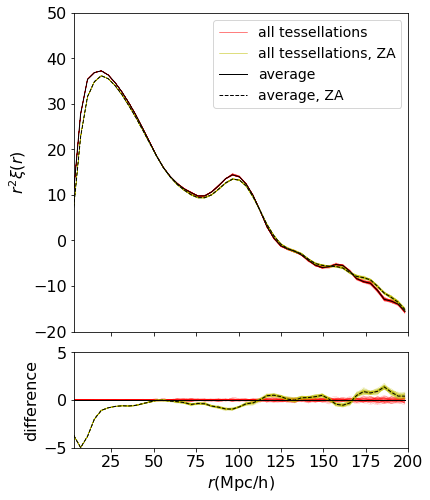

In [96]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1, 'height_ratios': [10, 3]})
fig.set_size_inches([6,8])

ru = 200
rl = 3


r = (xiCenRes[(0,0,0)]['rmax']+xiCenRes[(0,0,0)]['rmin'])/2
xiavgintp = interp1d(r,xiCenResavg)

for key in xiCenRes.keys():
    myxi = xiCenRes[key]['xi']
    axs[0].plot(r,myxi*r**2,'r',linewidth = 0.1)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',linewidth = 0.1)
axs[0].plot(r,myxi*r**2,'r',linewidth = 0.5,label = 'all tessellations')
axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',linewidth = 0.1)


for key in xiCenRes_ZApts.keys():
    myxi = xiCenRes_ZApts[key]['xi']
    axs[0].plot(r,myxi*r**2,'y',linewidth = 0.1)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'y',linewidth = 0.1)
axs[0].plot(r,myxi*r**2,'y',linewidth = 0.5,label = 'all tessellations, ZA')
axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'y',linewidth = 0.1)

axs[0].plot(r,xiCenResavg*r**2,'k'  ,label = 'average',linewidth = 1)
axs[1].plot(r,(xiCenResavg-xiavgintp(r))*r**2,'k',linewidth = 1)

axs[0].plot(r,xiCenResavg_ZApts*r**2,'k--'  ,label = 'average, ZA',linewidth = 1)
axs[1].plot(r,(xiCenResavg_ZApts-xiavgintp(r))*r**2,'k--',linewidth = 1)

# testxi = np.load(oakdir+"QuijoteData/Snapshots/fiducial_ZA/8/" + "xiCenresampled_snap%03d_tet%d_%d%d%d.npy"%(snapno,mytetsize,0,0,0))
# axs[0].plot(r,testxi['xi']*r**2,'g'  ,label = 'Fiducial_ZA/8')
# axs[1].plot(r,(testxi['xi']-xiavgintp(r))*r**2,'g')

axs[0].set_ylim(-20,50)
axs[1].set_ylim(-5,5)
axs[0].set_xlim(rl,ru)
axs[0].set_ylabel('$ r^2 \\xi (r) $',fontsize=16)
axs[1].set_ylabel('difference',fontsize=16)
axs[1].set_xlabel('$r$(Mpc/h)',fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[0].legend(fontsize=14)
# axs[0].set_title("z=%.1f"%zmap[snapno],fontsize=16)
plt.savefig('QuijoteCF_CenResample.pdf',bbox_inches='tight')
plt.show()

# plot tet8-resampled

In [7]:
# read
xiRes = {}
xiRes_ZApts = {}
mytetsize = 8
snapno = 4
xiResavg = 0
xiResavg_ZApts = 0
mysplit = 5
for xs in [0,2,4,6]:
    for ys in [0,2,4,6]:
        for zs in [0,2,4,6]:
            xiRes[(xs,ys,zs)] = np.load(snapdir + "xiresampled_snap%03d_tet%d_%d%d%d_split%d.npy"%(snapno,mytetsize,xs,ys,zs,mysplit))
            xiResavg = xiResavg + xiRes[(xs,ys,zs)]['xi']/(4**3)
            xiRes_ZApts[(xs,ys,zs)] = np.load(snapdir + "xiresampled_snap%03d_tet%d_%d%d%d_split%d_ZApts.npy"%(snapno,mytetsize,xs,ys,zs,mysplit))
            xiResavg_ZApts = xiResavg_ZApts + xiRes_ZApts[(xs,ys,zs)]['xi']/(4**3)

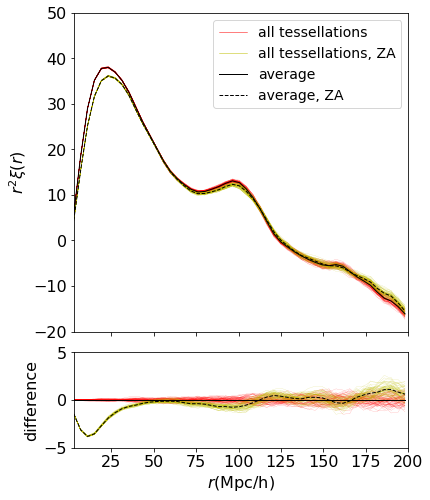

In [10]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1, 'height_ratios': [10, 3]})
fig.set_size_inches([6,8])

ru = 200
rl = 3


r = (xiRes[(0,0,0)]['rmax']+xiCenRes[(0,0,0)]['rmin'])/2
xiavgintp = interp1d(r,xiResavg)

for key in xiRes.keys():
    myxi = xiRes[key]['xi']
    axs[0].plot(r,myxi*r**2,'r',linewidth = 0.1)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',linewidth = 0.1)
axs[0].plot(r,myxi*r**2,'r',linewidth = 0.5,label = 'all tessellations')
axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',linewidth = 0.1)
for key in xiRes_ZApts.keys():
    myxi = xiRes_ZApts[key]['xi']
    axs[0].plot(r,myxi*r**2,'y',linewidth = 0.1)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'y',linewidth = 0.1)
axs[0].plot(r,myxi*r**2,'y',linewidth = 0.5,label = 'all tessellations, ZA')
axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'y',linewidth = 0.1)

axs[0].plot(r,xiResavg*r**2,'k'  ,label = 'average',linewidth = 1)
axs[1].plot(r,(xiResavg-xiavgintp(r))*r**2,'k',linewidth = 1)
axs[0].plot(r,xiResavg_ZApts*r**2,'k--'  ,label = 'average, ZA',linewidth = 1)
axs[1].plot(r,(xiResavg_ZApts-xiavgintp(r))*r**2,'k--',linewidth = 1)

axs[0].set_ylim(-20,50)
axs[1].set_ylim(-5,5)
axs[0].set_xlim(rl,ru)
axs[0].set_ylabel('$ r^2 \\xi (r) $',fontsize=16)
axs[1].set_ylabel('difference',fontsize=16)
axs[1].set_xlabel('$r$(Mpc/h)',fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[0].legend(fontsize=14)
#axs[0].set_title("z=%.1f"%zmap[snapno],fontsize=16)
# plt.savefig('QuijoteCF_resample.pdf',bbox_inches='tight')
plt.show()

In [ ]:
# difference between (mytetsize^3) tesselation is very small, compared to different simulation boxes

In [3]:
testxi = {}
mytetsize = 4
snapno = 4
testavg=0
for simno in range(500):
    testxi[simno] = np.load(oakdir+"QuijoteData/Snapshots/fiducial_ZA/%d/"%simno + "xiCenresampled_snap%03d_tet%d_%d%d%d.npy"%(snapno,mytetsize,0,0,0))
    testavg = testavg + testxi[simno]['xi']/500

In [2]:
testxi_ZApts = {}
mytetsize = 4
snapno = 4
testavg_ZApts=0
for simno in range(500):
    
    testxi_ZApts[simno] = np.load(oakdir+"QuijoteData/Snapshots/fiducial_ZA/%d/"%simno + "xiCenresampled_snap%03d_tet%d_%d%d%d_ZApts.npy"%(snapno,mytetsize,0,0,0))
    testavg_ZApts = testavg_ZApts + testxi_ZApts[simno]['xi']/500

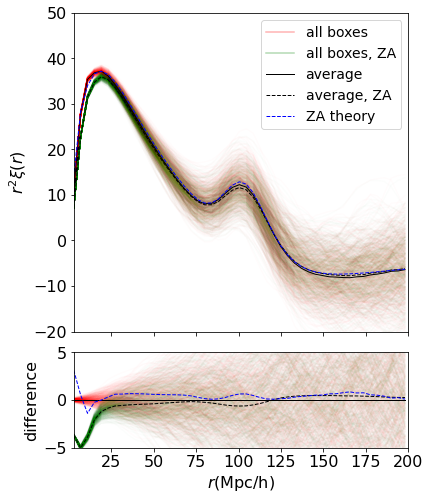

In [24]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1, 'height_ratios': [10, 3]})
fig.set_size_inches([6,8])

ru = 200
rl = 3


r = (xiRes[(0,0,0)]['rmax']+xiRes[(0,0,0)]['rmin'])/2
xiavgintp = interp1d(r,testavg)

for key in testxi.keys():
    myxi = testxi[key]['xi']
    axs[0].plot(r,myxi*r**2,'r',alpha = 0.01)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',alpha = 0.01)
axs[0].plot(0,0,'r',alpha = 0.3,label = 'all boxes')
# axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',alpha = 0.01)

for key in testxi_ZApts.keys():
    myxi = testxi_ZApts[key]['xi']
    axs[0].plot(r,myxi*r**2,'g',alpha = 0.01)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'g',alpha = 0.01)
axs[0].plot(0,0,'g',alpha = 0.3,label = 'all boxes, ZA')
# axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'g',alpha = 0.01)


axs[0].plot(r,testavg*r**2,'k'  ,label = 'average',linewidth = 1)
axs[1].plot(r,(testavg-xiavgintp(r))*r**2,'k',linewidth = 1)

axs[0].plot(r,testavg_ZApts*r**2,'k--'  ,label = 'average, ZA',linewidth = 1)
axs[1].plot(r,(testavg_ZApts-xiavgintp(r))*r**2,'k--',linewidth = 1)


axs[0].plot(r,xizel*r**2,'b--'  ,label = 'ZA theory',linewidth = 1)
axs[1].plot(r,(xizel-xiavgintp(r))*r**2,'b--',linewidth = 1)


axs[0].set_ylim(-20,50)
axs[1].set_ylim(-5,5)
axs[0].set_xlim(rl,ru)
axs[0].set_ylabel('$ r^2 \\xi (r) $',fontsize=16)
axs[1].set_ylabel('difference',fontsize=16)
axs[1].set_xlabel('$r$(Mpc/h)',fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[0].legend(fontsize=14)
#axs[0].set_title("z=%.1f"%zmap[snapno],fontsize=16)
plt.savefig('QuijoteCF_CenResample_allBox.pdf',bbox_inches='tight')
plt.show()

In [14]:
testxiRes = {}
mytetsize = 8
snapno = 4
testavgRes=0
for simno in range(500):
    testxiRes[simno] = np.load(oakdir+"QuijoteData/Snapshots/fiducial_ZA/%d/"%simno + "xiresampled_snap%03d_tet%d_%d%d%d_split5.npy"%(snapno,mytetsize,0,0,0))
    testavgRes = testavgRes + testxiRes[simno]['xi']/500

In [15]:
testxiRes_ZApts = {}
mytetsize = 8
snapno = 4
testavgRes_ZApts=0
for simno in range(500):
    testxiRes_ZApts[simno] = np.load(oakdir+"QuijoteData/Snapshots/fiducial_ZA/%d/"%simno + "xiresampled_snap%03d_tet%d_%d%d%d_split5_ZApts.npy"%(snapno,mytetsize,0,0,0))
    testavgRes_ZApts = testavgRes_ZApts + testxiRes_ZApts[simno]['xi']/500

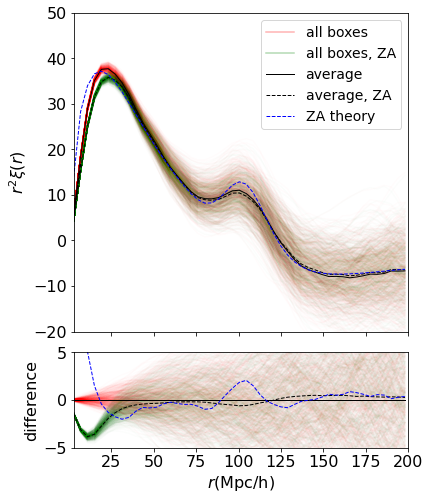

In [23]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1, 'height_ratios': [10, 3]})
fig.set_size_inches([6,8])

ru = 200
rl = 3


r = (xiRes[(0,0,0)]['rmax']+xiRes[(0,0,0)]['rmin'])/2
xiavgintp = interp1d(r,testavgRes)

for key in testxiRes.keys():
    myxi = testxiRes[key]['xi']
    axs[0].plot(r,myxi*r**2,'r',alpha = 0.01)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',alpha = 0.01)
axs[0].plot(0,0,'r',alpha = 0.3,label = 'all boxes')
#axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'r',alpha = 0.01)


for key in testxiRes_ZApts.keys():
    myxi = testxiRes_ZApts[key]['xi']
    axs[0].plot(r,myxi*r**2,'g',alpha = 0.01)
    axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'g',alpha = 0.01)
axs[0].plot(0,0,'g',alpha = 0.3,label = 'all boxes, ZA')
#axs[1].plot(r,(myxi-xiavgintp(r))*r**2,'g',alpha = 0.01)


axs[0].plot(r,testavgRes*r**2,'k'  ,label = 'average',linewidth = 1)
axs[1].plot(r,(testavgRes-xiavgintp(r))*r**2,'k',linewidth = 1)
axs[0].plot(r,testavgRes_ZApts*r**2,'k--'  ,label = 'average, ZA',linewidth = 1)
axs[1].plot(r,(testavgRes_ZApts-xiavgintp(r))*r**2,'k--',linewidth = 1)


axs[0].plot(r,xizel*r**2,'b--'  ,label = 'ZA theory',linewidth = 1)
axs[1].plot(r,(xizel-xiavgintp(r))*r**2,'b--',linewidth = 1)


axs[0].set_ylim(-20,50)
axs[1].set_ylim(-5,5)
axs[0].set_xlim(rl,ru)
axs[0].set_ylabel('$ r^2 \\xi (r) $',fontsize=16)
axs[1].set_ylabel('difference',fontsize=16)
axs[1].set_xlabel('$r$(Mpc/h)',fontsize=16)
axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[0].legend(fontsize=14)
#axs[0].set_title("z=%.1f"%zmap[snapno],fontsize=16)
plt.savefig('QuijoteCF_Resample_allBox.pdf',bbox_inches='tight')
plt.show()